# Funktioner og arrays

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

In [2]:
import numpy as np

## Funktioner

Forrige gang så vi på funktioner, vi vil fortsætte med det denne gang.
Husk at en funktion er en opskrift der beskriver hvordan en beregning
skal foretages som kan genbruges mange gange.

En funktion defineres med `def` hvorefter dens navn bliver sat og i
paranteserne sættes dens parametre (også kaldet argumenter).

In [3]:
def min_funktion(a, b):
    resultat = a * b 
    return resultat

Funktionen bliver først udført når den bliver kaldt, i dette tilfælde
f.eks.

In [4]:
mit_resultat = min_funktion(6, 7)
print(mit_resultat)

42

Hvor vi så har outputtet af funktionen i variablen `mit_resultat`.

### Opgave 1

Tablene nedenfor viser radius af forskellige celler typer

| Celle type                  | Radius      |
|-----------------------------|:------------|
| Mycoplasma                  | ~0,2–0,3 µm |
| Typisk bakterie             | ~1–2 µm     |
| Gærcelle (S. cerevisiae)    | ~5–7 µm     |
| Røde blodlegemer (menneske) | ~7–8 µm     |
| Lymfocyt (hvidt blodlegeme) | ~8–10 µm    |
| Typisk dyrecelle            | ~10–20 µm   |
| Typisk plantecelle          | ~20–100 µm  |
| Menneskelig ægcelle (oocyt) | ~120–140 µm |
| Neuron (cellekrop)          | ~10–100 µm  |

Celle størrelser

Vi har tidligere beregnet volumen af cellerne ved at antage at de er
kugleformede, hvorved at volumen er givet ved

$$
V(r) = \frac{4}{3}\pi r^3
$$

Skriv en funktion den tager radius `r` som argument og beregner
volumen - husk at du kan bruge `np.pi` istedet for at skrive $\pi$ ind
selv!

In [6]:
def volumen(r):
    return 4/3 * np.pi * r**3

Kald funktionen med nogle af de forskellige radius fra tablen

In [8]:
mycoplasma_volume = volumen(0.3)
print(mycoplasma_volume)

0.11309733552923253

## Arrays

Vi har tidligere set nogle af forskellige datatyper i Python

-   Integers (Heltal) `int`
-   Floats (Kommatal) `float`
-   Strings (Tekst) `str`

Men der er mange andre typer der kan være hjælpesomme i forskellige
sammenhæng. En sådan type er numpy arrays, et eksempel på et numpy array
er vist nedenfor

In [9]:
A = np.array([1.0, 2.5, 3.5])

Noget af det smarte med arrays er at vi kan lave operationer på alt
indeholdet på engang

In [10]:
B = 2 * A 
print(B)

[2. 5. 7.]

### Opgave 2

Lav et array der indeholder de angivne celle radii og brug din `volumen`
funktion til at beregne volumen af alle celler på engang

In [13]:
radii = np.array([0.2, 1, 6, 7.5, 9, 15, 60, 130, 50]) # Erstat ... med din kode

In [14]:
celle_volumner = volumen(radii)
print(celle_volumner)

[3.35103216e-02 4.18879020e+00 9.04778684e+02 1.76714587e+03
 3.05362806e+03 1.41371669e+04 9.04778684e+05 9.20277208e+06
 5.23598776e+05]

## Array operationer

Der er mange andre operationer vi kan lave på arrays, som f.eks. at
finde det største eller mindste tal

Vi kan finde celle-typen med den største volumen som

In [15]:
np.max(celle_volumner)

np.float64(9202772.0799157)

Den tilsvarende funktioner for at finde det mindste tal hedder `np.min`.

### Opgave 3

Cellen nedenfor laver et array med 1000 tal

In [16]:
array_med_tal = np.random.rand(1000) * np.exp(3.737669)

Brug `np.max` til at finde det største tal i `array_med_tal`

In [18]:
største_tal = np.max(array_med_tal)
print(største_tal)

41.94606530408412

## Array indeksering

Nogle gange er vi intereserede i specifikke indgange i et array, så vi
skal også kunne trække data ud af et array. Dette er “indexing”
(indeksering), f.eks. hvis vi har et array

In [19]:
mit_array = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

Kan vi bruge trække det fjerde tal ud sådan

In [20]:
fjerde_tal = mit_array[3] 

> **Vigtigt**
>
> I Python starter man med at tælle fra 0, så det fjerde tal findes på
> plads 3.

### Opgave 4

Brug indexing til at regne summen af

-   Det sidste tal (Plads 10)
-   Det andet tal (Plads 1)
-   Det fjerde tal (Plads ??)
-   Det ottende tal (Plads ??)

In [21]:
sum_af_tal = mit_array[10] + mit_array[1] + mit_array[3] + mit_array[7]
print(sum_af_tal)

42

### Opgave 5

I molekylær biologi arbejder vi ofte med spektra, hvor akserne f.eks. er

-   $x$: Bølgelængde målt i nm
-   $y$: Absorptions koefficient

In [23]:
from fysisk_biokemi import load_dataset

df = load_dataset("chlorophyll")
print(df)

bølgelængder = df['Wavelength(nm)'] # Et array med 501 indgange
adsorption = df['AdsorptionCoefficient'] # Et array med 501 indgange

     Wavelength(nm)  AdsorptionCoefficient
0               300              20487.000
1               301              20547.000
2               302              20642.000
3               303              20767.000
4               304              20899.000
..              ...                    ...
496             796                 26.665
497             797                 15.556
498             798                 29.164
499             799                 21.473
500             800                 18.396

[501 rows x 2 columns]

Text(0, 0.5, 'Adsorption Coefficient')

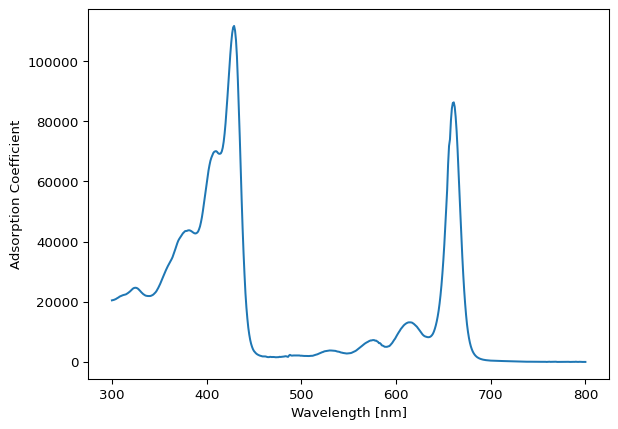

In [24]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(bølgelængder, adsorption)
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Adsorption Coefficient')

Vi vil gerne bruge NumPy til at finde hvad den maksimale adsorptions
koefficient er, og ved hvilken bølgelængde det forekommer.

Start med at finde den maksimale adsorptions koefficient ved brug af
`np.max`

In [25]:
max_adsorption = np.max(adsorption)
print(max_adsorption)

111700.0

Vi kan bruge en anden funktion fra NumPy til at finde den bølgelængde
hvor adsorptions koefficienter har sit maxima

In [27]:
index_max_ads = np.argmax(adsorption)

> **Note**
>
> `np.argmax` finder indekset af det **arg**ument som indeholder **max**
> værdien.

Brug nu `index_max_ads` til at trække den pågældende bølgelængde ud af
`bølgelængder`

In [29]:
bølgelængde_max_ads = bølgelængder[index_max_ads]

Text(0, 0.5, 'Adsorption Coefficient')

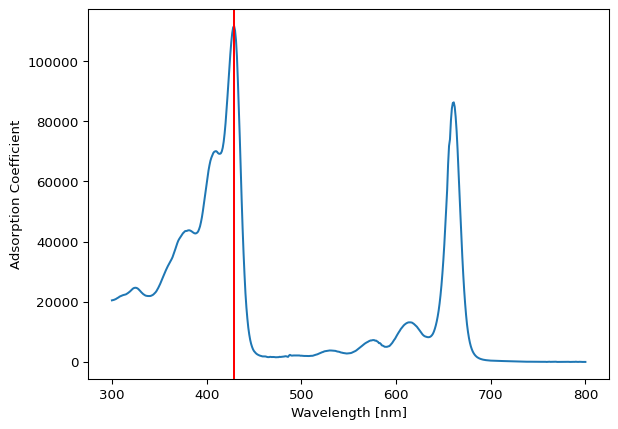

In [31]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(bølgelængder, adsorption)
ax.axvline(bølgelængde_max_ads, color='red')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Adsorption Coefficient')